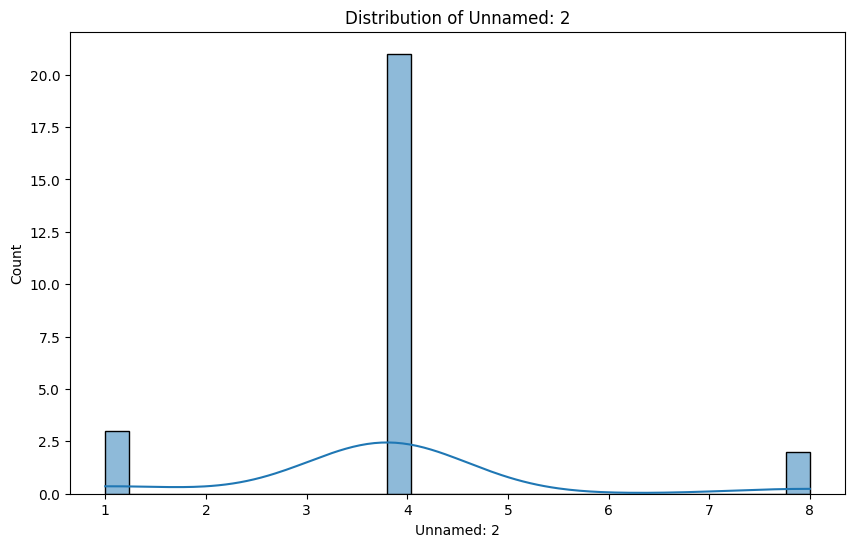

Only one numeric column available — scatter plot skipped.


c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1336: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1336: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1336: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1336: ConvergenceWarning: Number of distinct clusters (3) found smal

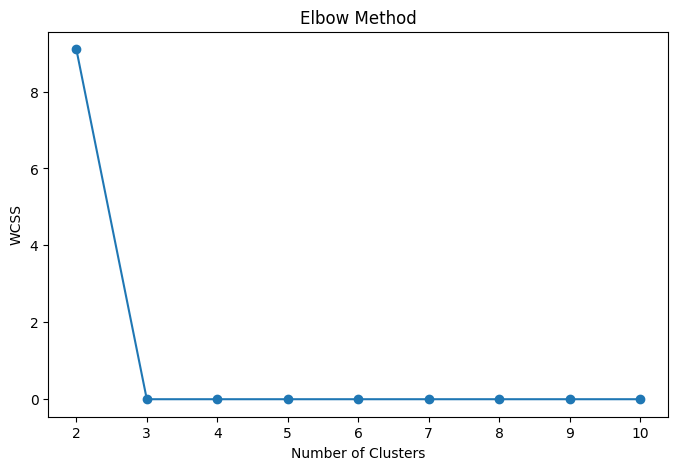

K-Means Silhouette Score: 1.0


c:\Users\Shreyas Mahale\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1336: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


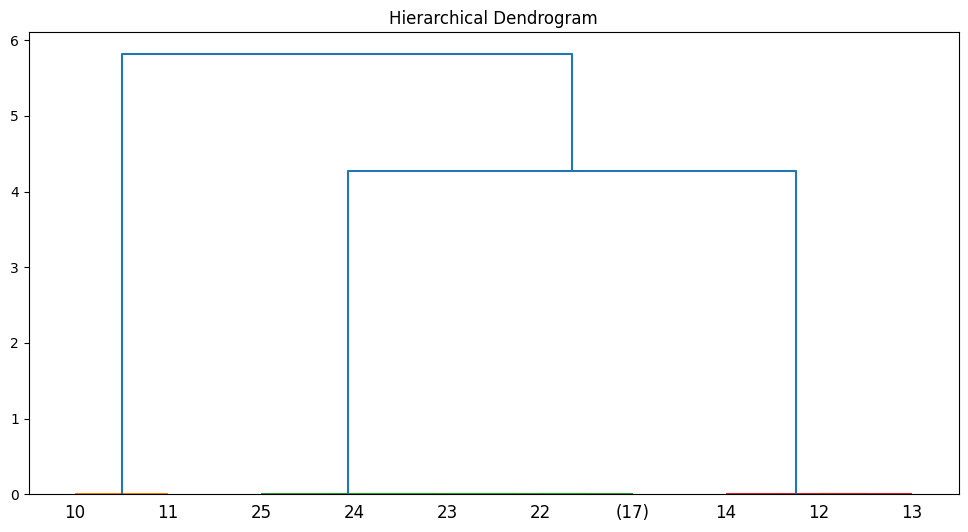

DBSCAN Silhouette Score: Not applicable


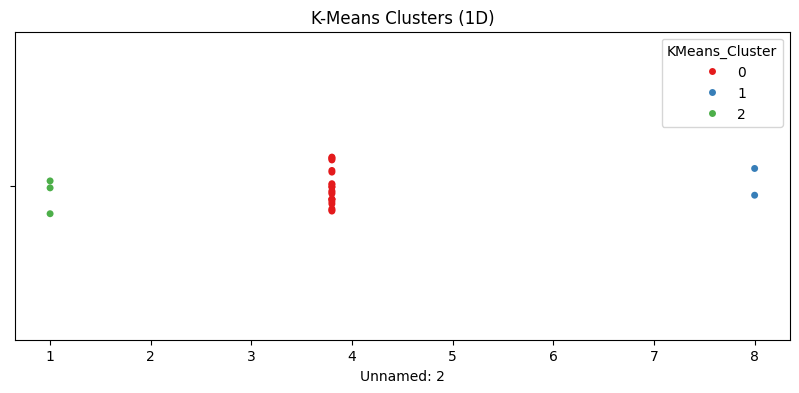

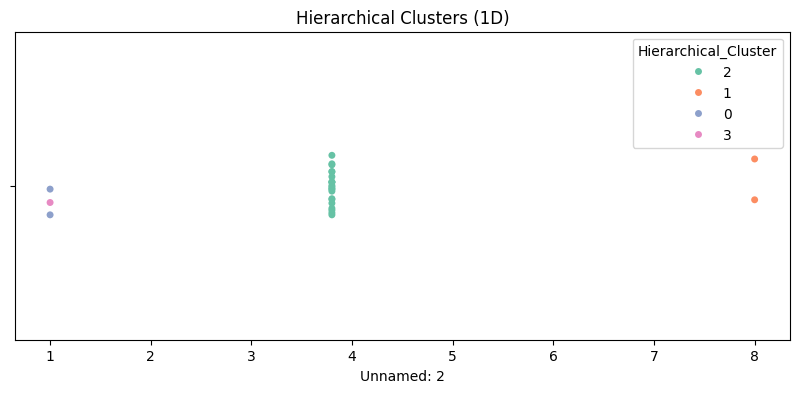

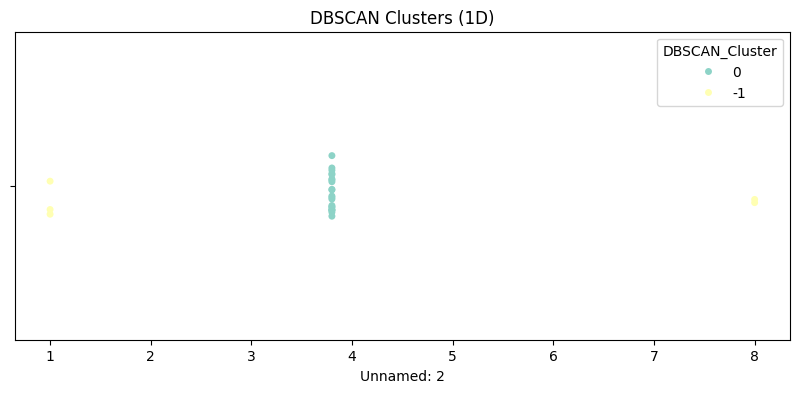


K-Means Cluster Means:
                Hierarchical_Cluster  DBSCAN_Cluster
KMeans_Cluster                                      
0                                2.0             0.0
1                                1.0            -1.0
2                                1.0            -1.0

Hierarchical Cluster Means:
                      KMeans_Cluster  DBSCAN_Cluster
Hierarchical_Cluster                                
0                                2.0            -1.0
1                                1.0            -1.0
2                                0.0             0.0
3                                2.0            -1.0

DBSCAN Cluster Means:
                KMeans_Cluster  Hierarchical_Cluster
DBSCAN_Cluster                                      
-1                         1.6                   1.0
 0                         0.0                   2.0

Analysis Completed Successfully ✅


In [15]:
# ============================================================
# Clustering Analysis: K-Means, Hierarchical, DBSCAN
# Dataset: EastWestAirlines.xlsx
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# ------------------------------------------------------------
# 1. Data Loading
# ------------------------------------------------------------
df = pd.read_excel(
    "C:\\Users\\Shreyas Mahale\\Downloads\\Clustering\\Clustering\\EastWestAirlines.xlsx"
)

# Clean column names
df.columns = df.columns.str.strip()

# ------------------------------------------------------------
# 2. Data Preprocessing (ROBUST & SAFE)
# ------------------------------------------------------------

# Drop ID column if present
if 'ID' in df.columns:
    df.drop(columns=['ID'], inplace=True)

# Keep ONLY numeric-looking columns safely
numeric_df = df.select_dtypes(include=[np.number])

# If Excel stored numbers as objects, force conversion column-wise
for col in df.columns:
    if col not in numeric_df.columns:
        converted = pd.to_numeric(df[col], errors='coerce')
        if converted.notna().sum() > 0:
            numeric_df[col] = converted

# Final numeric-only dataframe
numeric_df = numeric_df.select_dtypes(include=np.number)

# Replace ±inf with NaN
numeric_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Final NaN handling (CRITICAL)
numeric_df.fillna(numeric_df.mean(), inplace=True)

# HARD STOP safety checks
assert numeric_df.shape[1] > 0, "No numeric columns found!"
assert numeric_df.isna().sum().sum() == 0, "NaNs still present!"

# ------------------------------------------------------------
# 3. Feature Scaling
# ------------------------------------------------------------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# ------------------------------------------------------------
# 4. Exploratory Data Analysis
# ------------------------------------------------------------

num_cols = numeric_df.columns.tolist()

# Histogram for first numeric column (always safe)
plt.figure(figsize=(10, 6))
sns.histplot(numeric_df[num_cols[0]], bins=30, kde=True)
plt.title(f"Distribution of {num_cols[0]}")
plt.show()

# Scatter plot ONLY if at least 2 numeric columns exist
if len(num_cols) >= 2:
    x_col = num_cols[0]
    y_col = num_cols[1]

    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=numeric_df[x_col],
        y=numeric_df[y_col]
    )
    plt.title(f"{x_col} vs {y_col}")
    plt.show()
else:
    print("Only one numeric column available — scatter plot skipped.")

# ------------------------------------------------------------
# 5. K-Means Clustering
# ------------------------------------------------------------
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

print(
    "K-Means Silhouette Score:",
    silhouette_score(scaled_data, df['KMeans_Cluster'])
)

# ------------------------------------------------------------
# 6. Hierarchical Clustering
# ------------------------------------------------------------
linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Dendrogram")
plt.show()

hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
df['Hierarchical_Cluster'] = hierarchical.fit_predict(scaled_data)

# ------------------------------------------------------------
# 7. DBSCAN Clustering
# ------------------------------------------------------------
dbscan = DBSCAN(eps=1.2, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

mask = df['DBSCAN_Cluster'] != -1
if df.loc[mask, 'DBSCAN_Cluster'].nunique() > 1:
    print(
        "DBSCAN Silhouette Score:",
        silhouette_score(scaled_data[mask], df.loc[mask, 'DBSCAN_Cluster'])
    )
else:
    print("DBSCAN Silhouette Score: Not applicable")

# ------------------------------------------------------------
# 8. Cluster Visualization (1D – GUARANTEED SAFE)
# ------------------------------------------------------------

feature = numeric_df.columns[0]

# ----- K-Means -----
plt.figure(figsize=(10, 4))
sns.stripplot(
    x=numeric_df[feature],
    hue=df['KMeans_Cluster'].astype(str),
    palette='Set1',
    jitter=True
)
plt.title("K-Means Clusters (1D)")
plt.xlabel(feature)
plt.show()

# ----- Hierarchical -----
plt.figure(figsize=(10, 4))
sns.stripplot(
    x=numeric_df[feature],
    hue=df['Hierarchical_Cluster'].astype(str),
    palette='Set2',
    jitter=True
)
plt.title("Hierarchical Clusters (1D)")
plt.xlabel(feature)
plt.show()

# ----- DBSCAN -----
plt.figure(figsize=(10, 4))
sns.stripplot(
    x=numeric_df[feature],
    hue=df['DBSCAN_Cluster'].astype(str),
    palette='Set3',
    jitter=True
)
plt.title("DBSCAN Clusters (1D)")
plt.xlabel(feature)
plt.show()


# ------------------------------------------------------------
# 9. Cluster Interpretation
# ------------------------------------------------------------
print("\nK-Means Cluster Means:")
print(df.groupby('KMeans_Cluster').mean(numeric_only=True))

print("\nHierarchical Cluster Means:")
print(df.groupby('Hierarchical_Cluster').mean(numeric_only=True))

print("\nDBSCAN Cluster Means:")
print(df.groupby('DBSCAN_Cluster').mean(numeric_only=True))

print("\nAnalysis Completed Successfully ✅")
